In [1]:
'''
Program to visualize the data from 3D element analysis
Unit: mm
Author: Yitian Shao
Created on 2021.06.08
'''
# Repeat IPython function to prevent some graphical glitches
%matplotlib notebook 
%matplotlib notebook 

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#from .TriangleUnitAnalysis import TrianglePouch
#from .TriangleUnitAnalysis import RectanglePouch

In [2]:
'''
Pouch Design
'''
pouchStructure = np.array([5, 4, 3, 2, 1]) # Sealing dash number
rectNum = np.sum(pouchStructure + 1)
triNum = rectNum + np.sum(pouchStructure)
print("Pouch contains %d rectange and %d triangle" % (rectNum, triNum))

Pouch contains 20 rectange and 35 triangle


In [3]:
DATA_PATH = "./data/PouchData.csv"
data = pd.read_csv(DATA_PATH)
data.head(1)

,m,c,R,triFA,triPSA,triVol,rectVol,triAEF,rectAEF
0,1.0,1.0,1.0,1.570796,1.110721,0.819641,31.415927,13022.722001,22317.195371


In [4]:
totalVol = (triNum * data['triVol'] + rectNum * data['rectVol'])

<IPython.core.display.Javascript object>


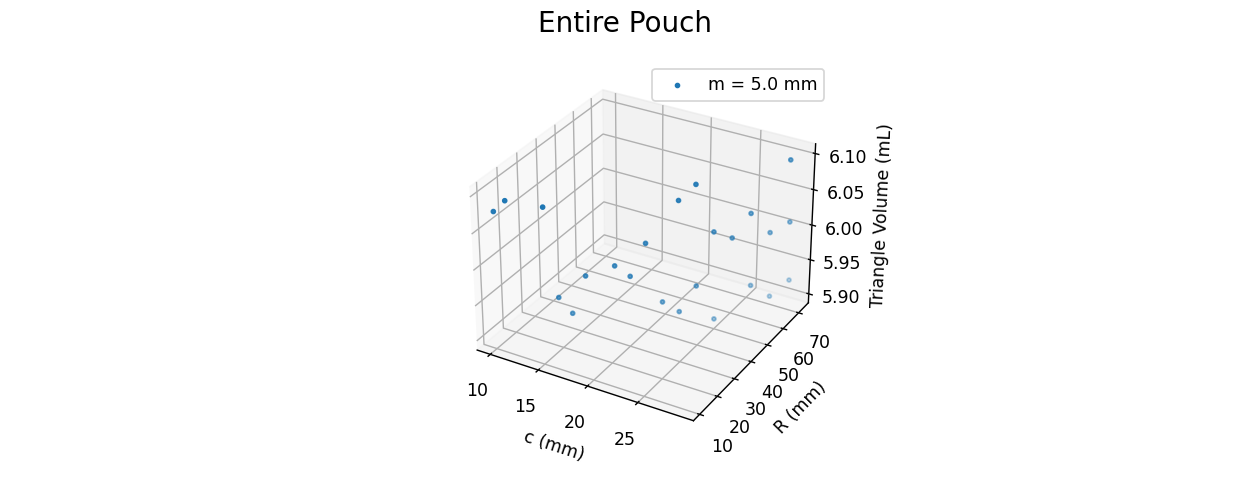

In [5]:
mLabels = [5.0]

# Total Volume
fig1 = plt.figure(figsize = (10,4))
fig1.suptitle('Entire Pouch', fontsize=16)
#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
ax = fig1.add_subplot(111, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Triangle Volume (mL)')

for mLabel in mLabels:
    ind = (data['m'] == mLabel) & (totalVol > 5900.0) & (totalVol < 6100.0)
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], totalVol[ind]/1000, s = 5)
ax.legend(['m = %.1f mm' % mLabel for mLabel in mLabels])
plt.show()

<IPython.core.display.Javascript object>


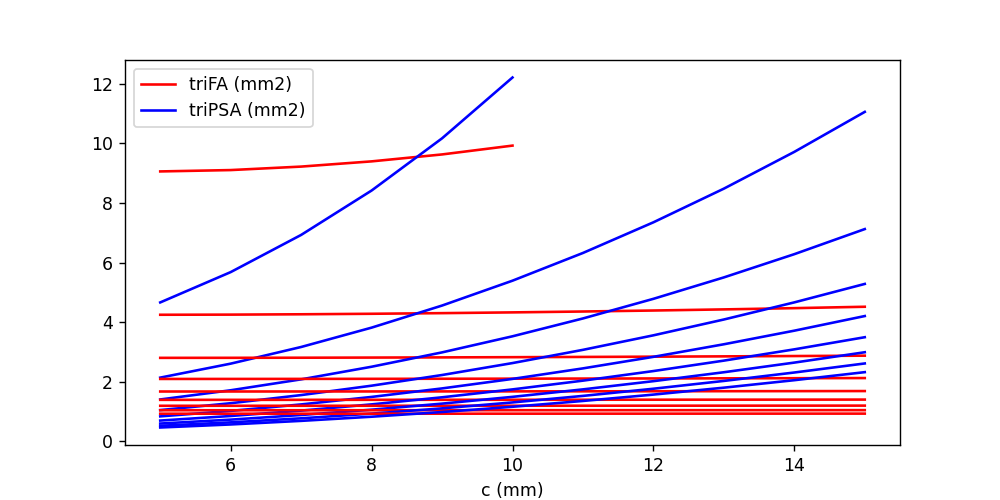

In [10]:
# Fixed R
fixRs = [10, 20, 30, 40, 50, 60, 70, 80, 90]
fig1 = plt.figure(figsize = (8,4))
ax = fig1.add_subplot(111)
ax.set_xlabel('c (mm)')

for fixR in fixRs:
    ind = (data['m'] == 5.0) & (data['R'] == fixR) & (data['c'] < 16)
    ax.plot(data.loc[ind,'c'], data.loc[ind,'triFA'], c = 'r')
    ax.plot(data.loc[ind,'c'], data.loc[ind,'triPSA'], c = 'b')
ax.legend(['triFA (mm2)','triPSA (mm2)'])
plt.show()

<IPython.core.display.Javascript object>


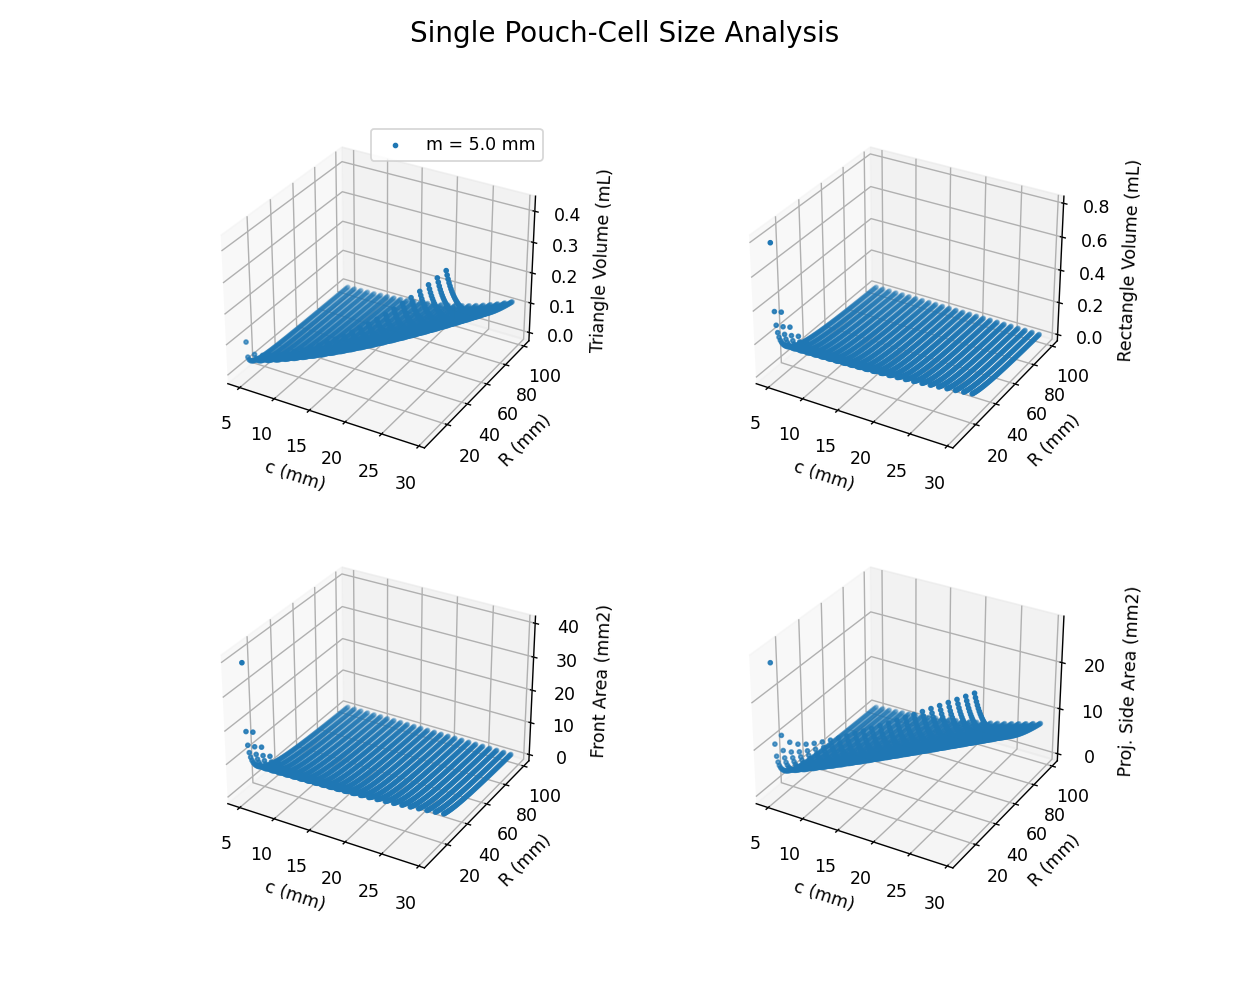

In [7]:
#mLabels = pd.unique(data['m'])
mLabels = [5.0]

# Single Pouch Size
fig1 = plt.figure(figsize = (10,8))
fig1.suptitle('Single Pouch-Cell Size Analysis', fontsize=16)

ax = fig1.add_subplot(221, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Triangle Volume (mL)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triVol']/1000, s = 5)
ax.legend(['m = %.1f mm' % mLabel for mLabel in mLabels])
plt.show()

ax = fig1.add_subplot(222, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Rectangle Volume (mL)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'rectVol']/1000, s = 5)
plt.show()

ax = fig1.add_subplot(223, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Front Area (mm2)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triFA'], s = 5)
plt.show()

ax = fig1.add_subplot(224, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Proj. Side Area (mm2)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triPSA'], s = 5)
plt.show()

# ax = fig1.add_subplot(223, projection='3d')
# ax.set_xlabel('c (mm)')
# ax.set_ylabel('R (mm)')
# ax.set_zlabel('Tri: Avg. El. Field (V/um)')
# for mLabel in mLabels:
#     ind = (data['m'] == mLabel) & (data['triAEF'] < 1e6)   
#     ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triAEF']/1000, s = 5)
# plt.show()

# ax = fig1.add_subplot(224, projection='3d')
# ax.set_xlabel('c (mm)')
# ax.set_ylabel('R (mm)')
# ax.set_zlabel('Rect: Avg. El. Field (V/um)')
# for mLabel in mLabels:
#     ind = (data['m'] == mLabel) & (data['rectAEF'] < 1e6) 
#     ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'rectAEF']/1000, s = 5)
# plt.show()

In [8]:
# # Test
# fig2 = plt.figure(figsize = (10,6))
# #plt.hist(data.loc[ind, 'triAEF'], bins = 1000);

# y = data.loc[ind & (data['triAEF'] < 1e6),'triAEF']/1000
# plt.scatter(data.loc[ind & (data['triAEF'] < 1e6),'c'], y)